<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK13_2%EA%B5%B0%EC%A7%91%ED%99%943.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05 DBSCAN(Density Based Spatial Clustering of Applications with Noise)

밀도 기반 군집화의 대표적 알고리즘

간단하고 직관적인 알고리즘/데이터 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능

가장 중요한 파라미터
* 입실론 주변 영역(eosilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의
* 핵심포인트: 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
* 이웃 포인트: 주변 영역 내에 위치한 타 데이터
* 경계 포인트: 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 가지고 있는 데이터
* 잡음 포인트: 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며 핵심 포인트도 이웃 포인트로 가지고 있지 않은 데이터


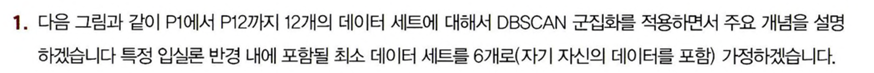

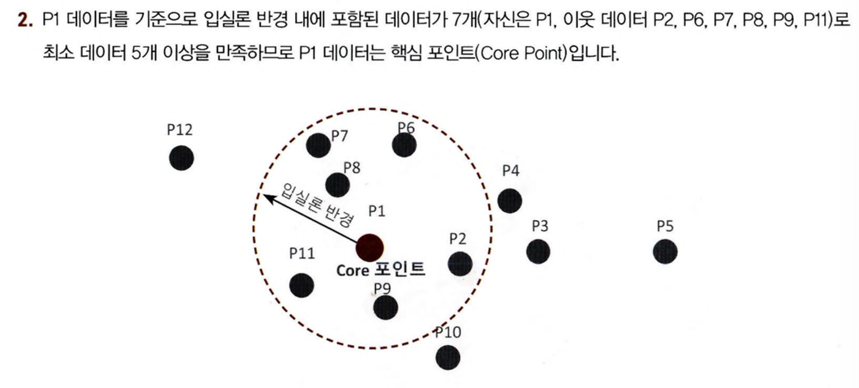

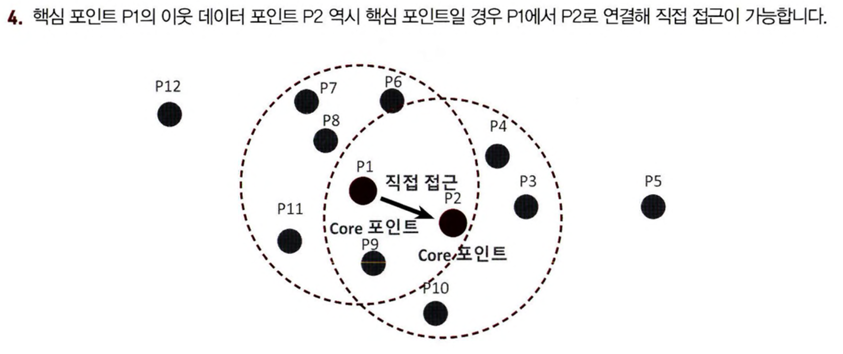

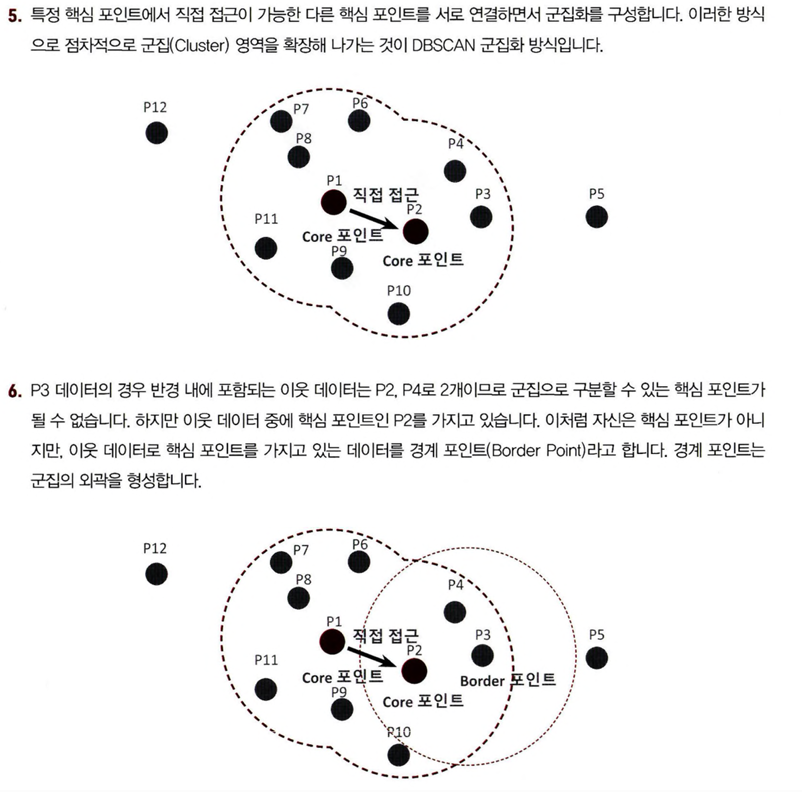


##DBSCAN적용하기- 붓꽃 데이터 세트

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [3]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


군집 레이블이 -1인것은 노이즈에 속하는 군집 의미

따라서 0,1 두개의 군집으로 군집화 된 것

타겟 유형이 3가지인데 군집이 2개가 됐다고 군집화 효율이 떨어지는 의미 아님

군집의 개수를 알고리즘에 따라 자동 지정하므로 군집의 개수 지정하는 것 무의미

특히 붓꽃데이터는 2개로 군집화 하는것이 더 효율이 좋은 면이 있음

PCA로 2개의 피처로 압축한 뒤 시각화

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# %matplotlib inline  # (주피터에서만 필요)

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    plt.figure(figsize=(8, 6))

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]

        plt.scatter(
            x=label_cluster['ftr1'],
            y=label_cluster['ftr2'],
            edgecolor='k',
            s=60,
            marker=markers[int(label) % len(markers)],
            label=f"Cluster {label}"
        )

        # 군집 중심 표시
        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            center_x_y = cluster_result.cluster_centers_[int(label)]

            plt.scatter(
                x=center_x_y[0], y=center_x_y[1],
                s=200,
                color='gray',
                alpha=0.9,
                marker=markers[int(label) % len(markers)]
            )
            plt.scatter(
                x=center_x_y[0], y=center_x_y[1],
                s=70,
                color='k',
                marker=f'${label}$'
            )

    plt.title("Cluster Visualization")
    plt.xlabel("ftr1")
    plt.ylabel("ftr2")
    plt.legend()
    plt.grid(True)
    plt.show()

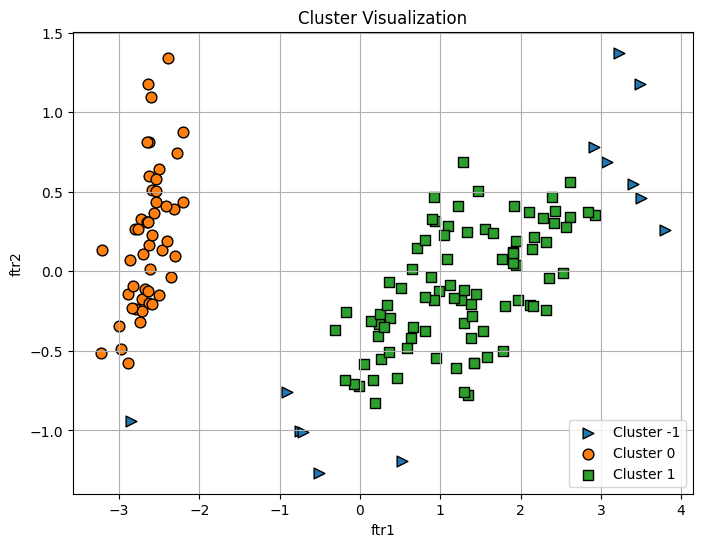

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

 DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음   
DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요

 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수
가 작아짐

 min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로
노이즈 데이터 개수가 커짐

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


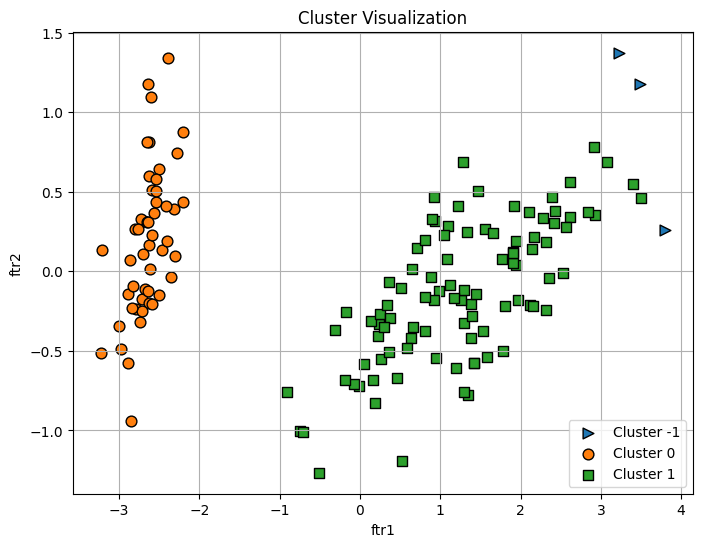

In [6]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

노이즈 감소

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


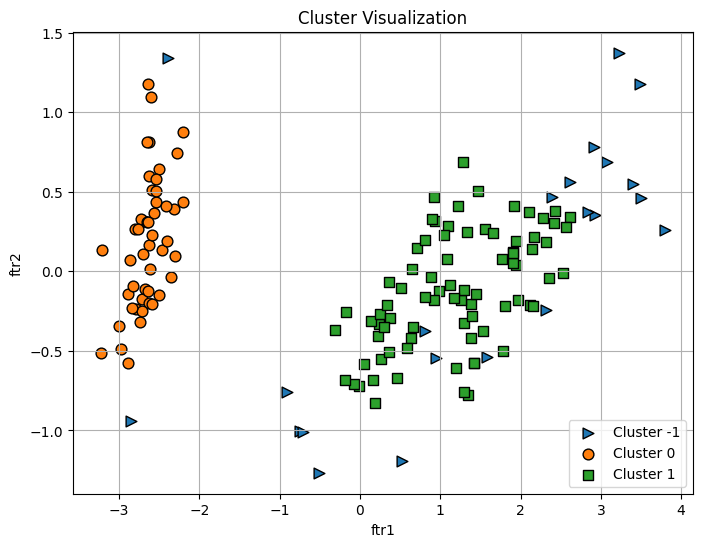

In [7]:
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

노이즈 증가

##DBSCAN 적용하기 -make_circles()데이터 세트

외부원,내부원 형태의 복잡한 기하학적 분포 데이터 세트에서 알고리즘 비교

make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정
할 필요가 없음

 파라미터 noise는 노이즈 데이터 세트의 비율이며, factor는 외부 원과 내부 원의
scale 비율



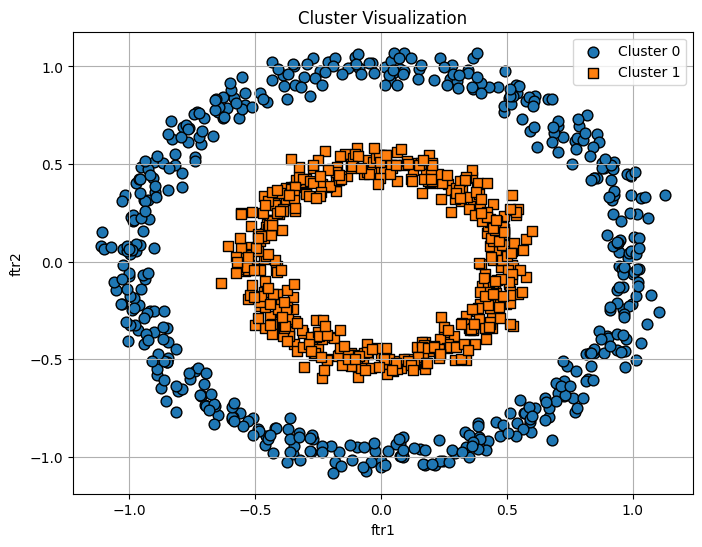

In [8]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

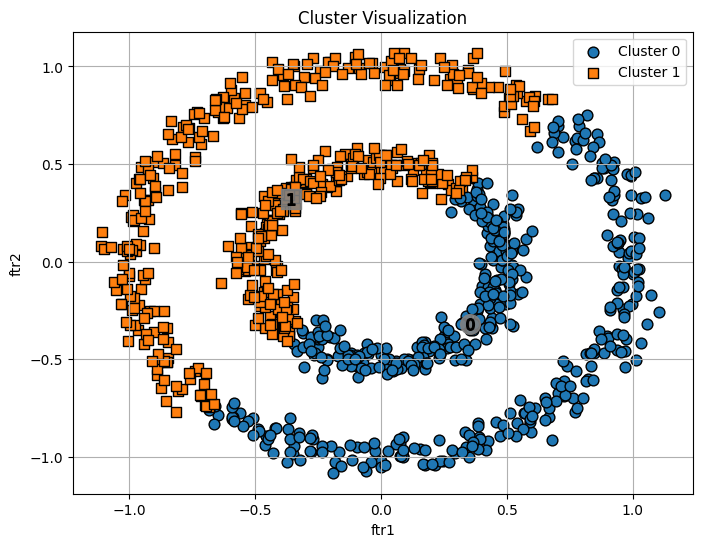

In [9]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels
visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter=True)

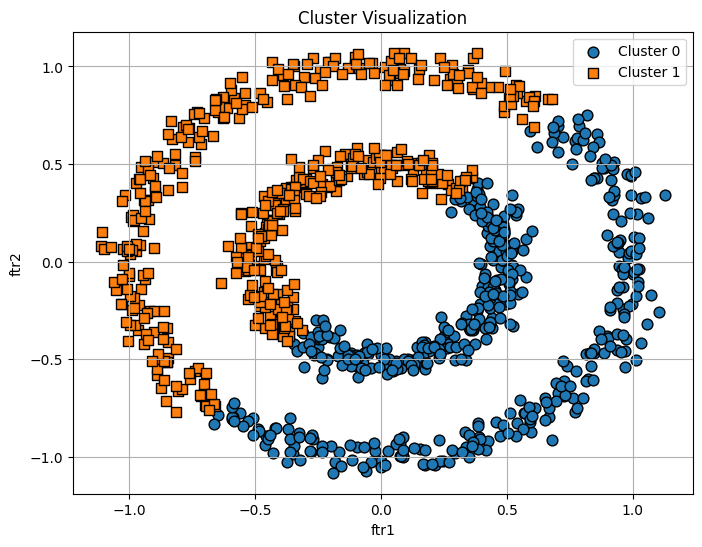

In [10]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=2,random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label
visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

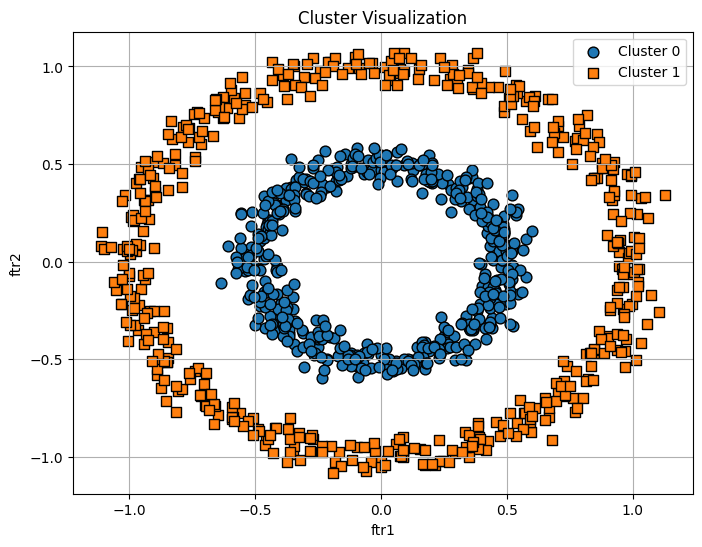

In [11]:

dbscan=DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_label=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_label
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)

# 06 군집화 실습-고객 세그먼테이션

## 고객 세그먼테이션의 정의와 기법

고객 세그먼테이션은 다양한 기준으로 고객을 분류하는 기법 지칭

마케팅의 중요 기반 요소

중요 분류 요소: 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가에 기반한 정보로 분류하는 것이 보통
=얼마나 많은 매출을 발생시키는가

주요 목표: 타깃 마켓팅
> 타깃 마케팅: 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공

RFM기법: 고객 분석 요소  
 * Recency(R): 가장 최근 상품 구입일에서 오늘까지의 기간
 * Frequency(F): 상품 구매 횟수
 * Monetary Value(M): 총 구매 금액

## 데이터 세트 로딩과 데이터 클렌징

In [18]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
retail_df=pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


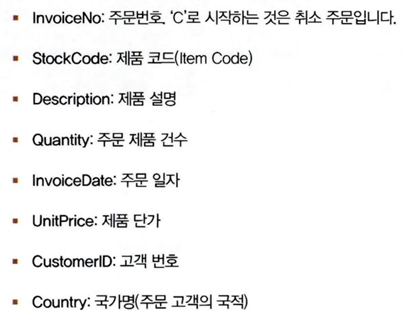

In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


CustomerlD가
Not Null인 데이터 건수는 406,829개로 무려 13만5천 건의 데이터가 Null입니다. 그 외에 다른 칼럼
의 경우도 오류 데이터가 존재

따라서 이 데이터 세트는 먼저 사전 정제 작업이 필요
* null데이터 제거
* 오류 데이터 삭제: 는 Quantity 또는 UnitPrice가 0보다 작은 경우

불린 인덱싱을 적용해 Quantity〉0, UnitPrice〉0이고 CustomerlD이 Not Null인 값만 다시 필터
링

In [19]:
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [20]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [21]:
# 영국만 남기기
retail_df=retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


##RFM 기반 데이터 가공

UnitPrice’와 ‘Quantity’# 곱해서 주문 금액 데이터
를 만들기

 CustomerNo도 더 편리한 식별성을 위해 float 형을 int 형으로 변경

In [22]:
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

해당 온라인 판매 데이터 세트는 주문 횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가지
고 있음

 개인 고객의 주문과 소매점의 주문이 함께 포함돼 있기 때문

In [23]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [24]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

 InvoiceNo 十 StockCode로 Group by를 수행하면 거
의 1 에 가깝게 유일한 식별자 레벨이 됨

고객 레벨로 주문 기간 주문홧수 주문 금액 데이터를 기반으로 세거먼테이션 수행해야하므로 주문번호와 상품코드 기중릐 데이터를 고객 기준의  Recency, Frequency, Monetary value 데이터로 변경

DF groupby만으로 여러개의 칼럼에 서로다른 aggregation연산을 수행하기 어려움

따라서 DataFramGroupby객체에 agg()이용

수행할 함수명 딕셔너리 형태로 입력하기

In [25]:
aggregations={
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
cust_df=retail_df.groupby('CustomerID').agg(aggregations)
cust_df=cust_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'sale_amount': 'Monetary'
})
cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


 Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 오늘 날짜를 기
준으로 가장 최근 주문 일자를 뺀 날짜

 여기서 주의할 점은 오늘 날짜를 현재 날짜로 해서는 안
됨

 온라인 판매 데이터가 2010년 12월 1일에서 2011년 12월 9일까지의 데이터이므로 오늘 날짜는 2011년 12월 9일에서 하루 더한 2011년 12월 10일로 해야함

In [26]:
import datetime as dt
cust_df['Recency']=dt.datetime(2011,12,10)-cust_df['Recency']
cust_df['Recency']=cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는',cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


##RFM 기반 고객 세그먼테이션

온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함하고 있음


이들은 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 나타내고 있으며 이로 인해 매우
왜곡된 데이터 분포도를 가지게 되어 군집화가 한쪽 군집에만 집중되는 현상이 발생

온라인 판매 데이터 세트의 칼럼별 히스토그램을 확인

왜곡된 데이터 분포도에서 군집화를 수행할 때 어떤 현상이 발생하는지 알아보기

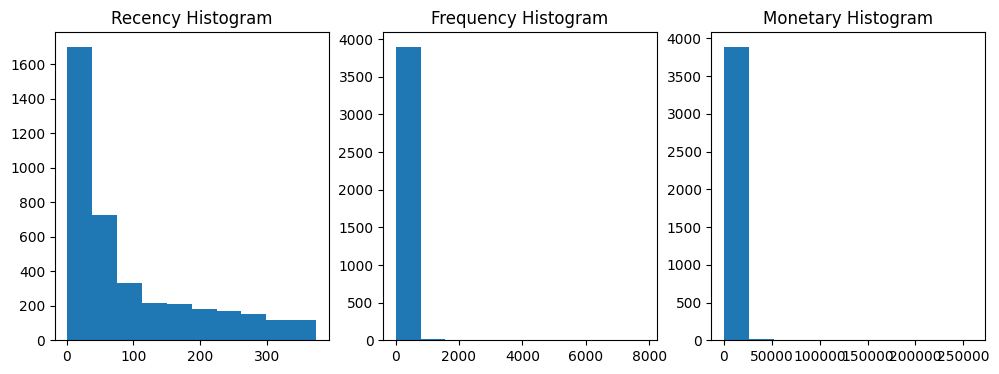

In [27]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])
ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])
ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

모두 왜곡됨

frequency, monetary의 왜곡 정도가 매우 심함

In [28]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


Recency는 평균이 92.7이지만, 50%（중위값 2/4 분위）인 51보다 크게 높음 그리고 max 값
은 374로 75%（3/4 분위）인 143보다 훨씬 커서 왜곡 정도가 높음을 알 수 있음

Frequency와 Monetary의 경우는 왜곡 정도가 더 심해서 Frequency의 평균이 90.3인데, 75%인 99.25에 가까움

왜곡 정도가* 매우 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력
이 떨어지는 군집화가 수행
>  StandardScaler로 평균과 표준편차를 재조정

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X_features=cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.576


안정적 수치

각 군집별 보기

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

def visualize_silhouette(cluster_lists, X_features):
    # Visualize Silhouette for each n in cluster_lists
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)

        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10

        axs[ind].set_title(
            f'Number of Cluster : {n_cluster}\nSilhouette Score : {round(silhouette_avg, 3)}'
        )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7
            )

            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()


def visualize_kmeans_plot_multi(cluster_lists, X_features, iscenter=False):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    pca = PCA(n_components=2, random_state=0)
    pca_transformed = pca.fit_transform(X_features)

    dataframe = pd.DataFrame(data=pca_transformed, columns=['ftr1', 'ftr2'])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(dataframe['cluster'])

        for label in unique_labels:
            label_cluster = dataframe[dataframe['cluster'] == label]
            axs[ind].scatter(
                x=label_cluster['ftr1'],
                y=label_cluster['ftr2'],
                edgecolor='k',
                marker=markers[label % len(markers)]
            )

        if iscenter and hasattr(kmeans, 'cluster_centers_'):
            center_x_y = pca.transform(kmeans.cluster_centers_)
            for label, center in enumerate(center_x_y):
                axs[ind].scatter(
                    x=center[0], y=center[1],
                    s=200, color='gray', alpha=0.9,
                    marker=markers[label % len(markers)]
                )
                axs[ind].scatter(
                    x=center[0], y=center[1],
                    s=70, color='k', edgecolor='k',
                    marker=f'${label}$'
                )

        axs[ind].set_title(f'Number of Cluster : {n_cluster}')
        axs[ind].set_xlabel('ftr1')
        axs[ind].set_ylabel('ftr2')

    plt.tight_layout()
    plt.show()


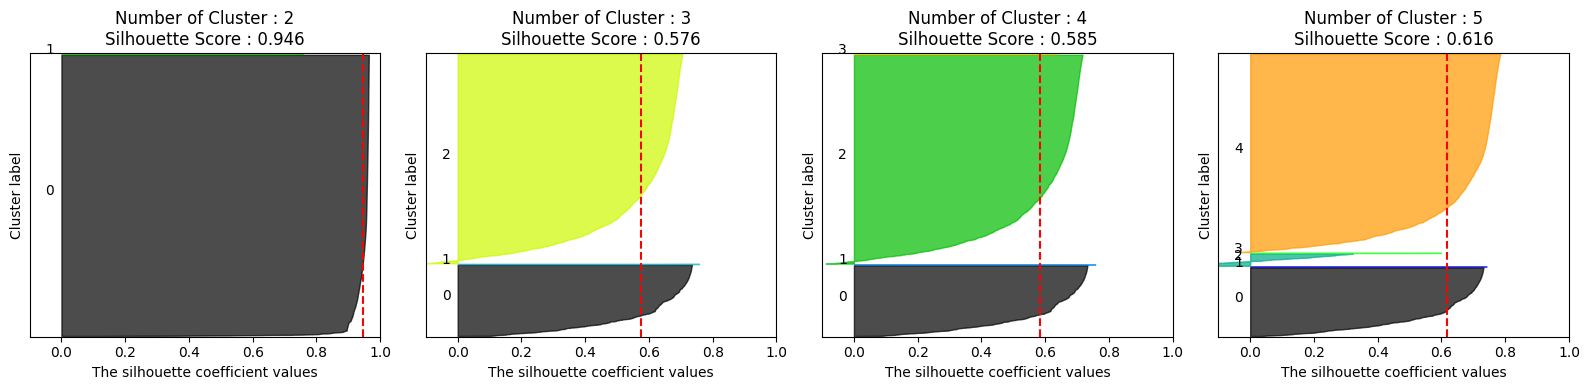

/tmp/ipython-input-218373028.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(
/tmp/ipython-input-218373028.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(


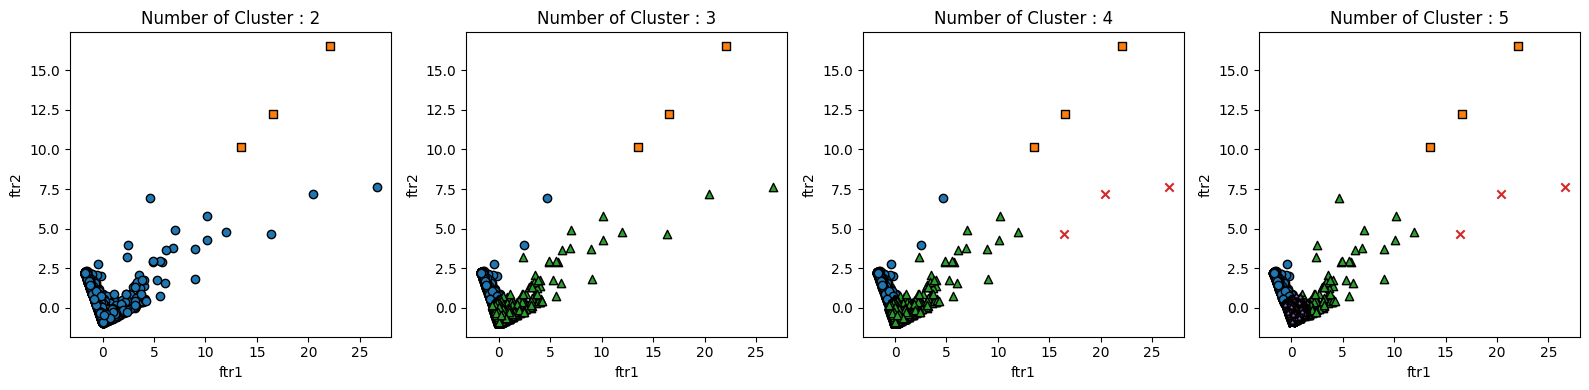

In [31]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

데이터 너무 왜곡되어 지나치게 일반적인 군집화 결과 도출

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

X_features=cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는: 0.303


실루엣 스코어는 로그 변환하기 전보다 떨어짐

하지만 실루엣 스코어의 절대치가 중요한 것이 아
님

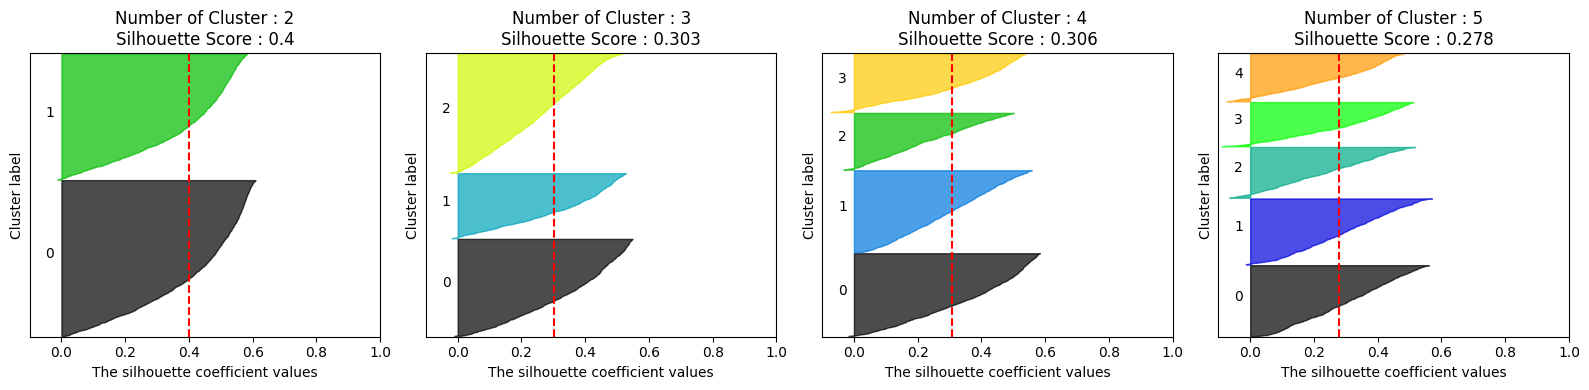

/tmp/ipython-input-218373028.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(
/tmp/ipython-input-218373028.py:79: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(


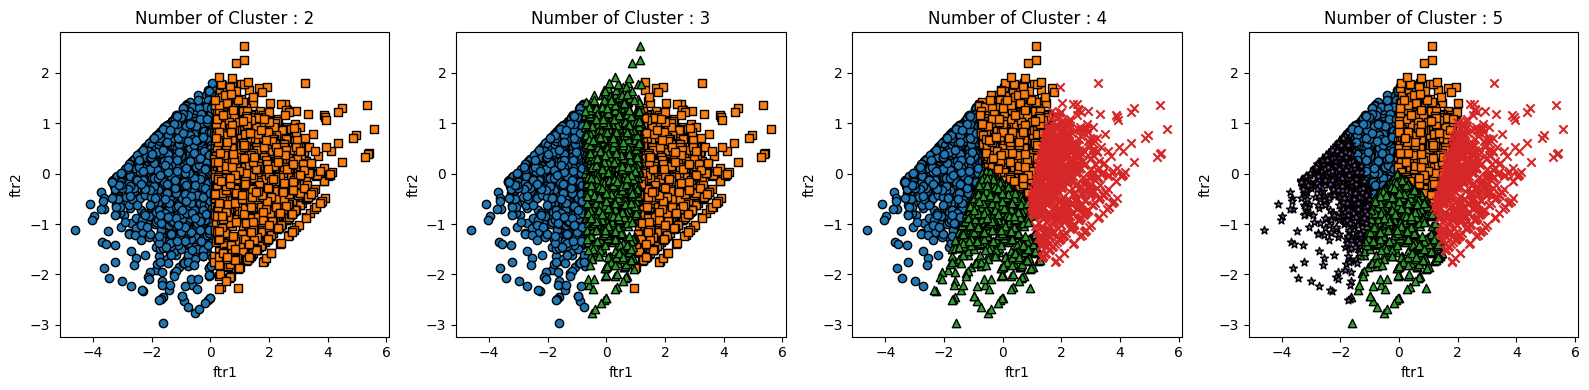

In [35]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

실루엣 스코어는 로그 변환하기 전보다 떨어지지만 앞의 경우보다 더 균일하게 군집화가 구성됐음을
위 그림을 통해 알 수 있음